In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# we drop the "Cabin" column because it's almost null everywhere
# and we drop "PassengerId" and "Name" because they are not relevant to the problem
to_drop = ["PassengerId", "Name", "Cabin"]

In [7]:
df.drop(to_drop,axis=1, inplace= True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [8]:
len(pd.unique(df["Ticket"]))

681

In [9]:
# the "Ticket" column contains 681 unique value out of 891 row
# we will drop this column because it is not usefull

In [10]:
df.drop(["Ticket"],axis=1, inplace= True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
df["Embarked"].value_counts(dropna=False)
# There are only 2 values missing
# We will drop the rows containing NaN in "Embarked"

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [12]:
df=df.dropna(subset=["Embarked"])
df["Embarked"].value_counts(dropna=False)

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
# we encode the categorical columns
dd_conv = pd.get_dummies(df,
                        columns=["Sex", "Embarked"],
                        drop_first=True)
dd_conv.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [14]:
# We fill the missing values in age column using the KNN imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer()
filled = imputer.fit_transform(dd_conv)

In [15]:
filled = pd.DataFrame(filled, columns=dd_conv.columns)

In [16]:
filled.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0


In [17]:
# SEPARATE FEATURES AND LABELS
labels = df[['Survived']]
labels.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [18]:
features = filled[filled.columns]
features.drop(['Survived'],
            axis=1,
            inplace=True)

features.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0
1,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0
2,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0
3,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0
4,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0


In [19]:
labels['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [ ]:
# scale the data

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dd_scaled = pd.DataFrame(scaler.fit_transform(features),
                        columns=features.columns)
features = dd_scaled
features.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.825209,-0.587512,0.431350,-0.474326,-0.500240,0.735342,-0.307941,0.616794
1,-1.572211,0.584800,0.431350,-0.474326,0.788947,-1.359911,-0.307941,-1.621287
2,0.825209,-0.294434,-0.475199,-0.474326,-0.486650,-1.359911,-0.307941,0.616794
3,-1.572211,0.364992,0.431350,-0.474326,0.422861,-1.359911,-0.307941,0.616794
4,0.825209,0.364992,-0.475199,-0.474326,-0.484133,0.735342,-0.307941,0.616794


In [54]:
# Data is slightly not balanced
# We will use SMOTE to upsample new data for class "1"

In [55]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(features,
                                labels)

In [56]:
X_res = pd.DataFrame(X_res,
                    columns=features.columns)
X_res.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.825209,-0.587512,0.431350,-0.474326,-0.500240,0.735342,-0.307941,0.616794
1,-1.572211,0.584800,0.431350,-0.474326,0.788947,-1.359911,-0.307941,-1.621287
2,0.825209,-0.294434,-0.475199,-0.474326,-0.486650,-1.359911,-0.307941,0.616794
3,-1.572211,0.364992,0.431350,-0.474326,0.422861,-1.359911,-0.307941,0.616794
4,0.825209,0.364992,-0.475199,-0.474326,-0.484133,0.735342,-0.307941,0.616794


In [57]:
y_res = pd.DataFrame(y_res,
                    columns=labels.columns)
y_res.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [58]:
# CHECK AGAIN BALANCE BETWEEN CLASSES
y_res['Survived'].value_counts()

1    549
0    549
Name: Survived, dtype: int64

In [59]:
# CLASSES ARE NOW BALANCED

In [60]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_res)

In [61]:
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1',
                                      'principal component 2'])
finalDf = pd.concat([principalDf,
                    y_res[['Survived']]],
                    axis = 1)
finalDf.head()

,principal component 1,principal component 2,Survived
0,-1.358964,0.355790,0
1,2.087645,-0.650797,1
2,-0.706257,0.452349,1
3,1.485750,-0.396201,1
4,-1.366864,-0.584018,0


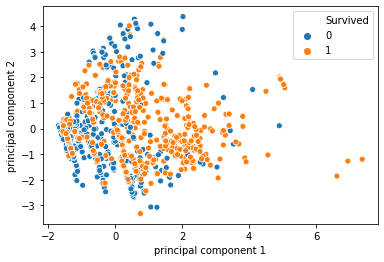

In [62]:
sns.scatterplot(x="principal component 1",
                y="principal component 2",
                hue="Survived",
                data=finalDf)

In [63]:
msk = np.random.rand(len(X_res)) < 0.8
X_train = X_res[msk]
X_test = X_res[~msk]
Y_train = y_res[msk]
Y_test = y_res[~msk]

In [64]:
# CREATE CLASSIFIERS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

In [65]:
svc = SVC(probability=True)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
ada = AdaBoostClassifier()
xgb = xgb.XGBClassifier(n_estimators=300)

In [66]:
# TRAIN THE CLASSIFIERS
svc.fit(X_train,
        Y_train)
knn.fit(X_train,
        Y_train)
rfc.fit(X_train,
        Y_train)
ada.fit(X_train,
        Y_train)
xgb.fit(X_train,
        Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [67]:
# MAKE PREDICTIONS ON THE TESTING SET
from sklearn.metrics import accuracy_score

In [68]:
svc_predictions = svc.predict(X_test)
print('svc accuracy',accuracy_score(svc_predictions, Y_test))

svc accuracy 0.8177570093457944


In [69]:
knn_predictions = knn.predict(X_test)
print('knn accuracy',accuracy_score(knn_predictions, Y_test))

knn accuracy 0.8084112149532711


In [70]:
rfc_predictions = rfc.predict(X_test)
print('rfc accuracy',accuracy_score(rfc_predictions, Y_test))

rfc accuracy 0.8364485981308412


In [71]:
ada_predictions = ada.predict(X_test)
print('ada accuracy',accuracy_score(ada_predictions, Y_test))

ada accuracy 0.8084112149532711


In [72]:
xgb_predictions = xgb.predict(X_test)
print('xgb accuracy',accuracy_score(xgb_predictions, Y_test))

xgb accuracy 0.8504672897196262


In [39]:
# XGBOOST OUTPERFORMS ALL OTHER MODELS WITH 86.5% ACCURACY

In [73]:
# CORRELATION BETWEEN BAD PREDICTIONS OF CLASSIFIERS
svc_wrong = 1*abs(svc_predictions-Y_test['Survived'].to_numpy())
knn_wrong = 1*abs(knn_predictions-Y_test['Survived'].to_numpy())
rfc_wrong = 1*abs(rfc_predictions-Y_test['Survived'].to_numpy())
ada_wrong = 1*abs(ada_predictions-Y_test['Survived'].to_numpy())
xgb_wrong = 1*abs(xgb_predictions-Y_test['Survived'].to_numpy())

Id_wrong = svc_wrong+knn_wrong+rfc_wrong+ada_wrong+xgb_wrong

In [74]:
Id_wrong = pd.DataFrame(Id_wrong,
                    columns=['bad'])

pcawrong = pca.transform(X_test)

In [75]:
principalDfwrong = pd.DataFrame(data = pcawrong,
                           columns = ['principal component 1',
                                      'principal component 2'])
finalDfwrong = pd.concat([principalDfwrong,
                    Id_wrong[['bad']]],
                    axis = 1)
finalDfwrong.head()

,principal component 1,principal component 2,bad
0,-1.366864,-0.584018,0
1,0.634265,0.798080,0
2,-0.356319,2.389964,0
3,0.698957,2.768197,0
4,-0.831761,0.953965,5


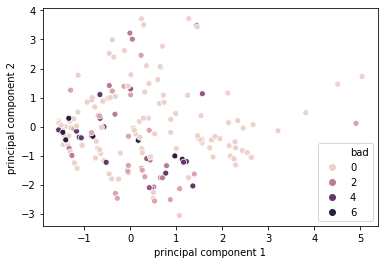

In [76]:
sns.scatterplot(x="principal component 1",
                y="principal component 2",
                hue="bad",
                data=finalDfwrong)

In [77]:
from sklearn.ensemble import VotingClassifier
estimators=[('svc', svc), ('knn', knn), ('rfc', rfc), ('ada', ada), ('xgb', xgb)]
eclf1 = VotingClassifier(estimators=estimators,
                        voting='hard')

In [78]:
eclf1.fit(X_train,
        Y_train)

eclf1_predictions = eclf1.predict(X_test)
print('ensemble accuracy',accuracy_score(eclf1_predictions, Y_test))

ensemble accuracy 0.8364485981308412


In [79]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimators=[('svc', svc), ('knn', knn), ('rfc', rfc), ('ada', ada), ('xgb', xgb)]
stack = StackingClassifier(estimators=estimators,
                        final_estimator=LogisticRegression())

In [80]:
stack.fit(X_train,
        Y_train)

StackingClassifier(cv=None,
                   estimators=[('svc',
                                SVC(C=1.0, break_ties=False, cache_size=200,
                                    class_weight=None, coef0=0.0,
                                    decision_function_shape='ovr', degree=3,
                                    gamma='scale', kernel='rbf', max_iter=-1,
                                    probability=True, random_state=None,
                                    shrinking=True, tol=0.001, verbose=False)),
                               ('knn',
                                KNeighborsClassifier(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     met...
                                              seed=None, silent=None,
                                              subsample=1, verbosity=1))],
                   final_es

In [81]:
stack_predictions = stack.predict(X_test)
print('stacking accuracy',accuracy_score(stack_predictions, Y_test))

stacking accuracy 0.8411214953271028


In [ ]:
# The best strategy is to use a stacking classifier